In [7]:
# Numpy
import numpy as np

# Torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# Torchvision
import torchvision
import torchvision.transforms as transforms

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 12, 4, stride=2, padding=1),            # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),           # [batch, 24, 8, 8]
            nn.ReLU(),
            nn.Conv2d(24, 48, 4, stride=2, padding=1),           # [batch, 48, 4, 4]
            nn.ReLU(),
            nn.Conv2d(48, 96, 4, stride=2, padding=1),           # [batch, 96, 2, 2]
             nn.ReLU(),
        )
        self.decoder = nn.Sequential(
             nn.ConvTranspose2d(96, 48, 4, stride=2, padding=1),  # [batch, 48, 4, 4]
             nn.ReLU(),
            nn.ConvTranspose2d(48, 24, 4, stride=2, padding=1),  # [batch, 24, 8, 8]
            nn.ReLU(),
            nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),   # [batch, 3, 32, 32]
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

    
SEED = 87
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)


def print_model(encoder, decoder):
    print("============== Encoder ==============")
    print(encoder)
    print("============== Decoder ==============")
    print(decoder)
    print("")
    
def create_model():
    autoencoder = Autoencoder()
    print_model(autoencoder.encoder, autoencoder.decoder)
    if torch.cuda.is_available():
        autoencoder = autoencoder.cuda()
        print("Model moved to GPU in order to speed up training.")
    return autoencoder


def get_torch_vars(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)




    # Create model
autoencoder = create_model()

    # Load data
transform = transforms.Compose(
    [transforms.ToTensor(), ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                              shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                             shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


criterion = nn.BCELoss()
optimizer = optim.Adam(autoencoder.parameters())

for epoch in range(100):
    running_loss = 0.0 
    for i, (inputs, _) in enumerate(trainloader, 0): 
        inputs = get_torch_vars(inputs)

        # ============ Forward ============
        encoded, outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        # ============ Backward ============
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # ============ Logging ============
        running_loss += loss.data
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0 

print('Finished Training')
print('Saving Model...')

model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save


============== Encoder ==============
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(24, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(48, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
)
============== Decoder ==============
Sequential(
  (0): ConvTranspose2d(96, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(48, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): Sigmoid()
)

Model moved to GPU in order to speed up training.


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[1,  2000] loss: 0.593
[2,  2000] loss: 0.571
[3,  2000] loss: 0.566
[4,  2000] loss: 0.563
[5,  2000] loss: 0.561
[6,  2000] loss: 0.559
[7,  2000] loss: 0.558
[8,  2000] loss: 0.558
[9,  2000] loss: 0.558
[10,  2000] loss: 0.556
[11,  2000] loss: 0.557
[12,  2000] loss: 0.556
[13,  2000] loss: 0.556
[14,  2000] loss: 0.555
[15,  2000] loss: 0.555
[16,  2000] loss: 0.554
[17,  2000] loss: 0.554
[18,  2000] loss: 0.554
[19,  2000] loss: 0.554
[20,  2000] loss: 0.554
[21,  2000] loss: 0.554
[22,  2000] loss: 0.554
[23,  2000] loss: 0.554
[24,  2000] loss: 0.554
[25,  2000] loss: 0.554
[26,  2000] loss: 0.554
[27,  2000] loss: 0.554
[28,  2000] loss: 0.553
[29,  2000] loss: 0.553
[30,  2000] loss: 0.554
[31,  2000] loss: 0.553
[32,  2000] loss: 0.553
[33,  2000] loss: 0.553
[34,  2000] loss: 0.553
[35,  2000] loss: 0.553
[36,  2000] loss: 0.553
[37,  2000] loss: 0.553
[38,  2000] loss: 0.553
[39,  20

NameError: name 'model' is not defined

In [8]:
model_scripted = torch.jit.script(autoencoder) # Export to TorchScript
model_scripted.save('model_scripted.pt') # Save

In [10]:
torch.save(autoencoder, 'model_scripted_2.pt')

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship


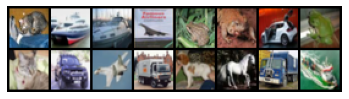

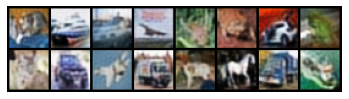

In [14]:
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# OS
import os
import argparse

def imshow(img):
    npimg = img.cpu().numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(testloader)
    
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(16)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images.cuda())

decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))


In [15]:
torch.save(autoencoder.state_dict(), 'model_weights.pt')

In [19]:
#Test Loading

autoencoder_2 = create_model()
autoencoder_2.load_state_dict(torch.load("./model_weights.pt"))
autoencoder_2.to('cuda')

============== Encoder ==============
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(24, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(48, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
)
============== Decoder ==============
Sequential(
  (0): ConvTranspose2d(96, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(48, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (7): Sigmoid()
)

Model moved to GPU in order to speed up training.


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(24, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(48, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(96, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(48, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Sigmoid()
  )
)